<ipython-input-2-f5c5af9d7ab8>:44: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x_own, y_own, basefmt=" ", linefmt='C0-', markerfmt='C0o', label='Собственная реализация', use_line_collection=True)
<ipython-input-2-f5c5af9d7ab8>:45: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x_lib, y_lib, basefmt=" ", linefmt='C1-', markerfmt='C1x', label='Библиотечная реализация', use_line_collection=True)


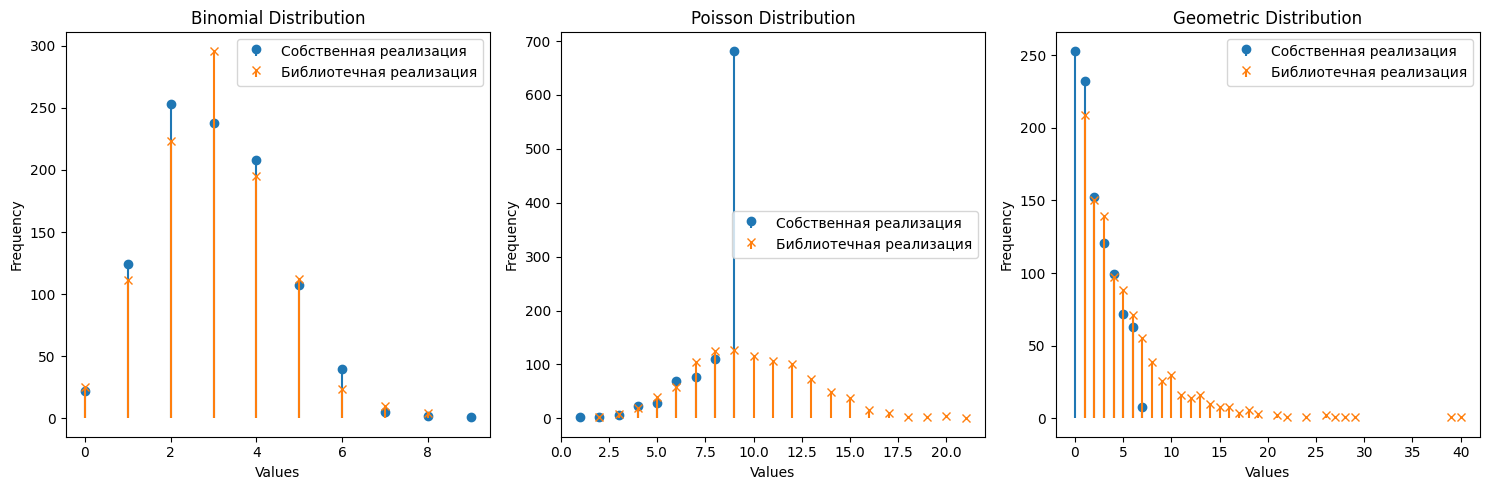

In [ ]:


import math
import random
import numpy as np
import matplotlib.pyplot as plt

def binomial_distribution(n, p):
    P = [math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in range(n)]
    return generate_discrete_random_variable(P, "binomial")

def poisson_distribution(lambda_val):
    P = [math.exp(-lambda_val) * (lambda_val ** k) / math.factorial(k) for k in range(int(lambda_val))]
    return generate_discrete_random_variable(P, "Poisson")

def geometric_distribution(p):
    P = [(1 - p) ** (k-1) * p for k in range(10)]
    return generate_discrete_random_variable(P, "geometric")

def generate_discrete_random_variable(P, distribution_type):
    M = random.uniform(0, 1)
    m = 0

    while m < len(P) - 1 and M > P[m]:#пока M больше кумулятивной вероятности для текущего значения,
        M -= P[m] #  уменьшаем M на эту вероятность
        m += 1 #и переходим к следующему значению.

    return m

def calculate_frequencies(values):
    frequencies = {}
    for value in values:
        if value in frequencies:
            frequencies[value] += 1
        else:
            frequencies[value] = 1
    return frequencies

def lolipop_plot(frequencies_own, frequencies_lib, title):
    x_own = list(frequencies_own.keys())
    y_own = list(frequencies_own.values())

    x_lib = list(frequencies_lib.keys())
    y_lib = list(frequencies_lib.values())

    plt.stem(x_own, y_own, basefmt=" ", linefmt='C0-', markerfmt='C0o', label='Собственная реализация', use_line_collection=True)
    plt.stem(x_lib, y_lib, basefmt=" ", linefmt='C1-', markerfmt='C1x', label='Библиотечная реализация', use_line_collection=True)

    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

# Пример использования
n_samples = 1000
size_binom, prob_binom = 10, 0.3
lambda_val = 4
p_geom = 0.2

binom_values_own = [binomial_distribution(size_binom, prob_binom) for _ in range(n_samples)]
poisson_values_own = [poisson_distribution(lambda_val) for _ in range(n_samples)]
geom_values_own = [geometric_distribution(p_geom) for _ in range(n_samples)]

# Генерация значений с использованием библиотечных функций
lib_binom_values = np.random.binomial(size_binom, prob_binom, n_samples)
lib_poisson_values = np.random.poisson(lambda_val, n_samples)
lib_geom_values = np.random.geometric(p_geom, n_samples)

# Рассчитываем частоты
binom_frequencies_own = calculate_frequencies(binom_values_own)
poisson_frequencies_own = calculate_frequencies(poisson_values_own)
geom_frequencies_own = calculate_frequencies(geom_values_own)

lib_binom_frequencies = calculate_frequencies(lib_binom_values)
lib_poisson_frequencies = calculate_frequencies(lib_poisson_values)
lib_geom_frequencies = calculate_frequencies(lib_geom_values)

# Создаем графики lolipop
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
lolipop_plot(binom_frequencies_own, lib_binom_frequencies, "Binomial Distribution")

plt.subplot(1, 3, 2)
lolipop_plot(poisson_frequencies_own, lib_poisson_frequencies, "Poisson Distribution")

plt.subplot(1, 3, 3)
lolipop_plot(geom_frequencies_own, lib_geom_frequencies, "Geometric Distribution")

plt.tight_layout()
plt.show()


SyntaxError: ignored

Основные характеристики выборки (binomial распределение):
Выборочное среднее: 3.063
Выборочная дисперсия: 2.2390309999999993
Выборочное среднеквадратическое отклонение: 1.496339199513265
Максимальное значение выборки: 8
Минимальное значение выборки: 0


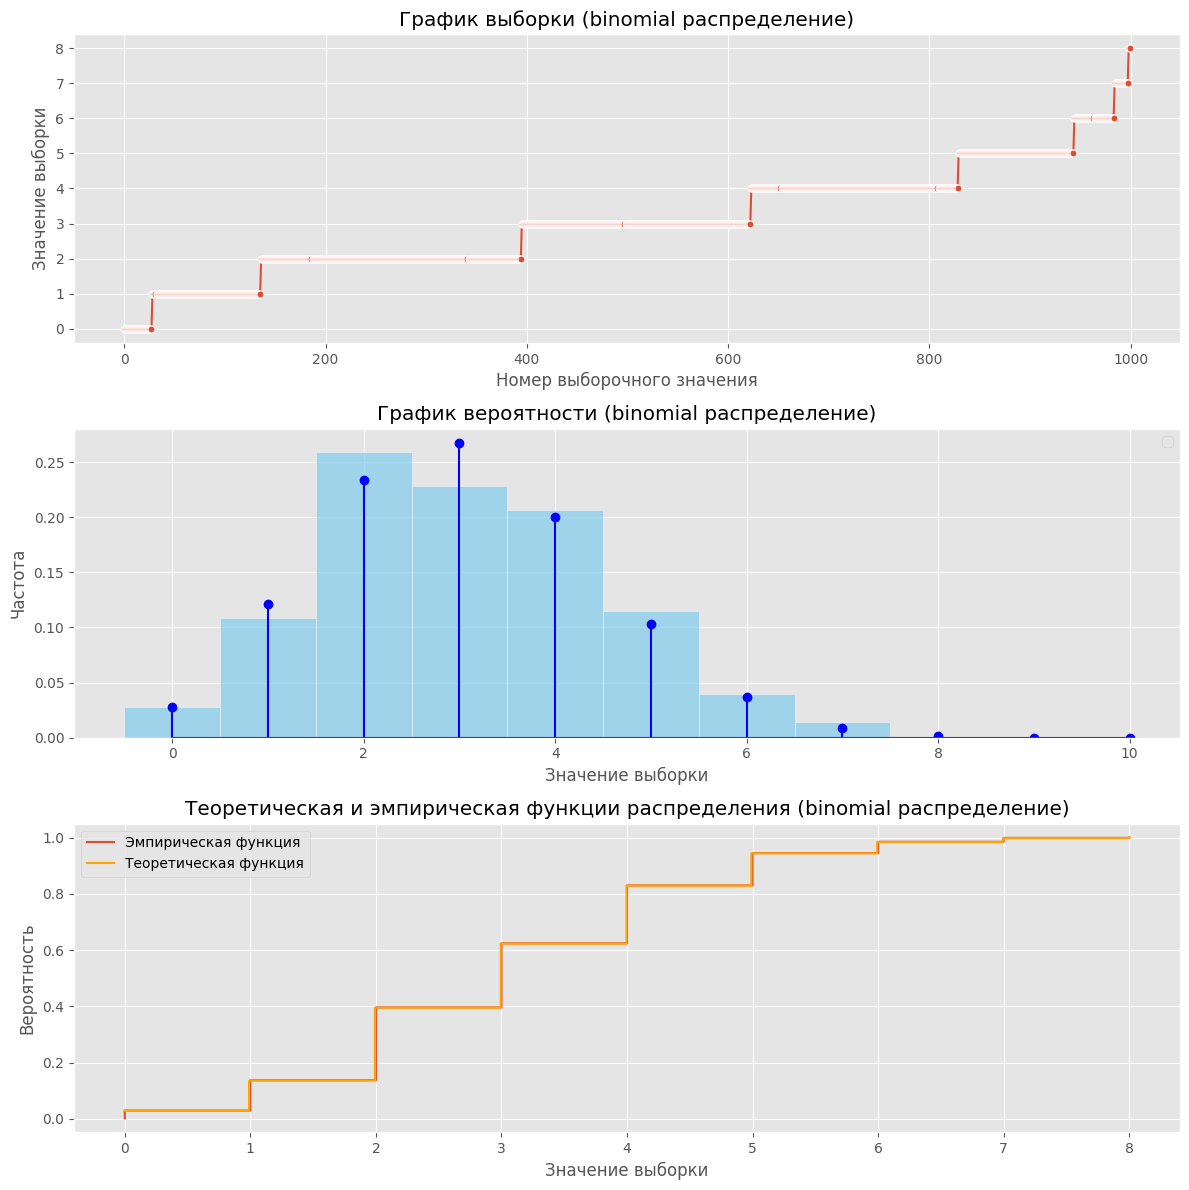

Основные характеристики выборки (poisson распределение):
Выборочное среднее: 4.075
Выборочная дисперсия: 4.303375
Выборочное среднеквадратическое отклонение: 2.0744577604762164
Максимальное значение выборки: 14
Минимальное значение выборки: 0


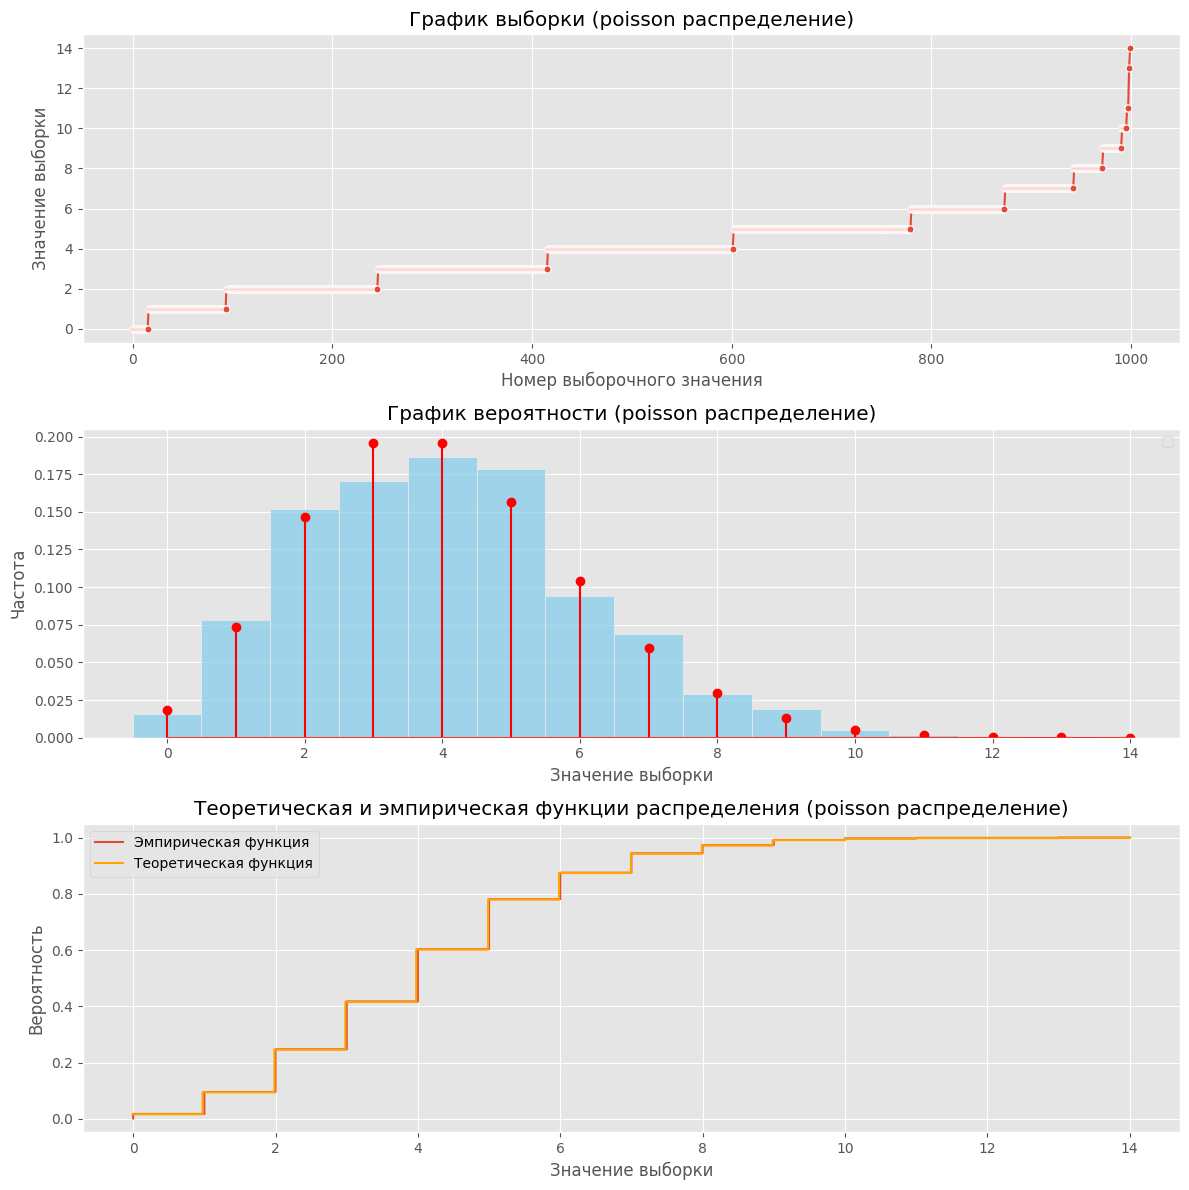

Основные характеристики выборки (geometric распределение):
Выборочное среднее: 4.97
Выборочная дисперсия: 22.5751
Выборочное среднеквадратическое отклонение: 4.75132613067131
Максимальное значение выборки: 38
Минимальное значение выборки: 1


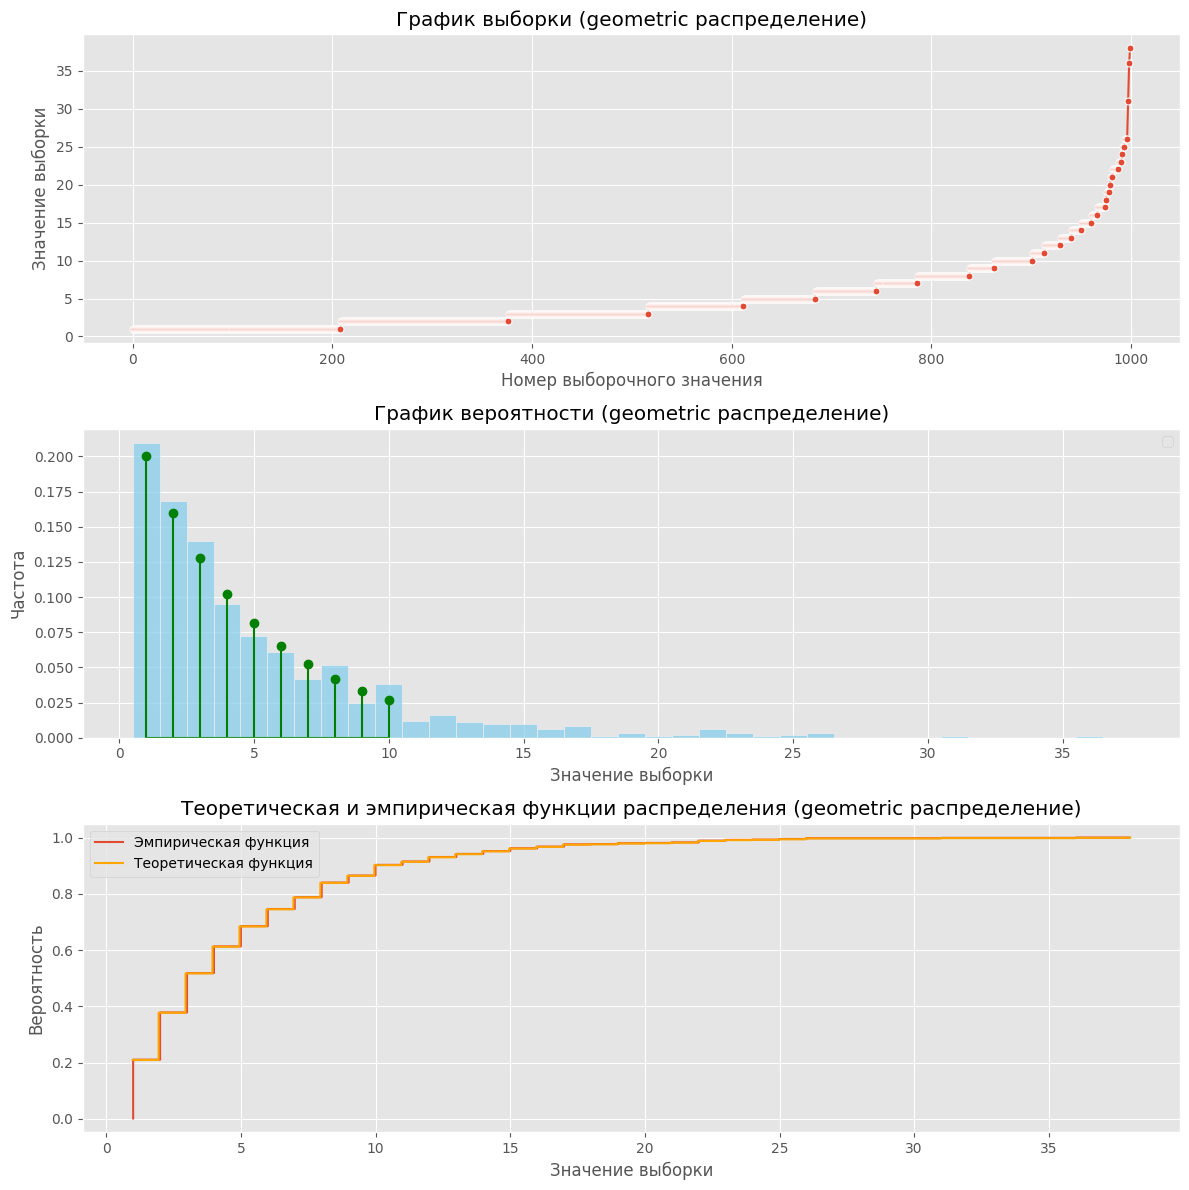

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import cumfreq
from scipy.stats import binom, poisson, geom
plt.style.use("ggplot")

# Функция для генерации случайной выборки и построения графиков
def generate_sample_and_plot(distribution_type, params, sample_size):
    if distribution_type == "binomial":
        sample = np.random.binomial(params['n'], params['p'], sample_size)
    elif distribution_type == "poisson":
        sample = np.random.poisson(params['lambda'], sample_size)
    elif distribution_type == "geometric":
        sample = np.random.geometric(params['p'], sample_size)
    else:
        raise ValueError("Неизвестный тип распределения")

    # Сортируем выборку
    sorted_sample = np.sort(sample)

    plt.figure(figsize=(12, 12))

    # График выборки
    plt.subplot(3, 1, 1)
    sns.lineplot(x=np.arange(len(sorted_sample)), y=sorted_sample, marker='o', markersize=5)
    plt.title(f"График выборки ({distribution_type} распределение)")
    plt.xlabel('Номер выборочного значения')
    plt.ylabel('Значение выборки')

    # График вероятности
    plt.subplot(3, 1, 2)
    if distribution_type == "binomial":
        n_binom, p_binom = 10, 0.3
        x_binom = np.arange(0, n_binom + 1)
        pmf_binom = binom.pmf(x_binom, n_binom, p_binom)
        plt.stem(x_binom, pmf_binom, basefmt="b-", linefmt="b-", markerfmt="bo")
    elif distribution_type == "poisson":
       lambda_poisson = 4
       x_poisson = np.arange(0, 15)  # Выберем произвольный диапазон для пуассоновского распределения
       pmf_poisson = poisson.pmf(x_poisson, lambda_poisson)
       plt.stem(x_poisson, pmf_poisson, basefmt="r-", linefmt="r-", markerfmt="ro")
    elif distribution_type == "geometric":
       x_geom = np.arange(1, 11)
       p_geom = 0.2
       pmf_geom = geom.pmf(x_geom, p_geom)
       plt.stem(x_geom, pmf_geom, basefmt="g-", linefmt="g-", markerfmt="go")
    else:
        raise ValueError("Неизвестный тип распределения")

    sns.histplot(sorted_sample, bins=np.arange(min(sorted_sample), max(sorted_sample) + 1) - 0.5, kde=False, stat="probability", color='skyblue')
    plt.title(f"График вероятности ({distribution_type} распределение)")
    plt.xlabel('Значение выборки')
    plt.ylabel('Частота')
    plt.legend()

    # Теоретическая и эмпирическая функции распределения


    plt.subplot(3, 1, 3)
    x = np.sort(sorted_sample)
    y = np.arange(1, len(sorted_sample) + 1) / len(sorted_sample)
    plt.step(x, y, label='Эмпирическая функция')

    # Эмпирическая функция распределения
    cf = cumfreq(sorted_sample, numbins=len(sorted_sample))
    plt.step(cf.lowerlimit + np.linspace(0, cf.binsize * cf.cumcount.size, cf.cumcount.size),
             cf.cumcount / len(sorted_sample), label='Теоретическая функция', color='orange')

    plt.title(f"Теоретическая и эмпирическая функции распределения ({distribution_type} распределение)")
    plt.xlabel('Значение выборки')
    plt.ylabel('Вероятность')
    plt.legend()



    # Вывод основных числовых характеристик выборки
    print(f"Основные характеристики выборки ({distribution_type} распределение):")
    print("Выборочное среднее:", np.mean(sorted_sample))
    print("Выборочная дисперсия:", np.var(sorted_sample))
    print("Выборочное среднеквадратическое отклонение:", np.std(sorted_sample))
    print("Максимальное значение выборки:", np.max(sorted_sample))
    print("Минимальное значение выборки:", np.min(sorted_sample))

    plt.tight_layout()
    plt.show()

# Параметры распределений
binomial_params = {'n': 10, 'p': 0.3}
poisson_params = {'lambda': 4}
geometric_params = {'p': 0.2}

# Размер выборки
sample_size = 1000

# Генерация и анализ для биномиального распределения
generate_sample_and_plot("binomial", binomial_params, sample_size)

# Генерация и анализ для распределения Пуассона
generate_sample_and_plot("poisson", poisson_params, sample_size)

# Генерация и анализ для геометрического распределения
generate_sample_and_plot("geometric", geometric_params, sample_size)


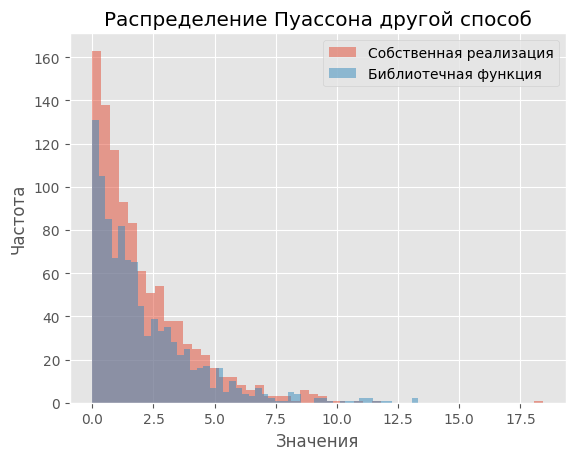

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_transform_exp(u, lam):
    # Используем обратную функцию от экспоненциального распределения
    return -np.log(1 - u) / lam

# Задаем параметры экспоненциального распределения
lam = 0.5  # параметр lambda

# Генерируем случайные числа из равномерного распределения на интервале [0, 1]
random_uniform_values = np.random.rand(1000)

# Применяем обратную функцию от экспоненциального распределения
generated_values = inverse_transform_exp(random_uniform_values, lam)

# Сравниваем с библиотечной функцией
library_values = np.random.exponential(1/lam, 1000)

# Визуализация результатов
plt.title(f"Распределение Пуассона другой способ")
plt.hist(generated_values, bins=50, alpha=0.5, label='Собственная реализация')
plt.hist(library_values, bins=50, alpha=0.5, label='Библиотечная функция')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()


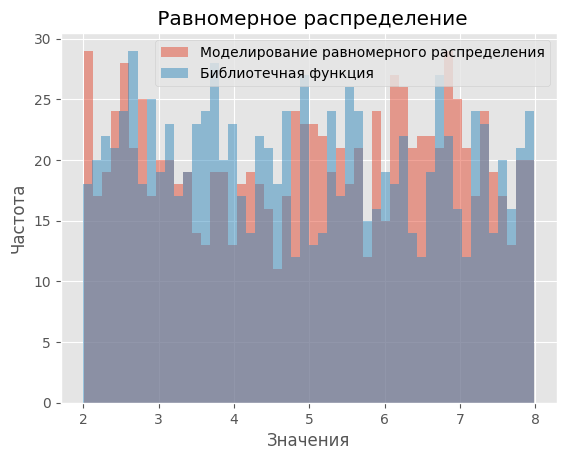

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_transform_uniform(u, a, b):
    # Используем обратную функцию от равномерного распределения
    return a + u * (b - a)

# Задаем параметры равномерного распределения
a = 2
b = 8

# Генерируем случайные числа из равномерного распределения на интервале [0, 1]
random_uniform_values = np.random.rand(1000)

# Применяем обратную функцию от равномерного распределения
generated_values = inverse_transform_uniform(random_uniform_values, a, b)

# Сравниваем с библиотечной функцией
library_values = np.random.uniform(a, b, 1000)

# Визуализация результатов
plt.title(f" Равномерное распределение")
plt.hist(generated_values, bins=50, alpha=0.5, label='Моделирование равномерного распределения')
plt.hist(library_values, bins=50, alpha=0.5, label='Библиотечная функция')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()


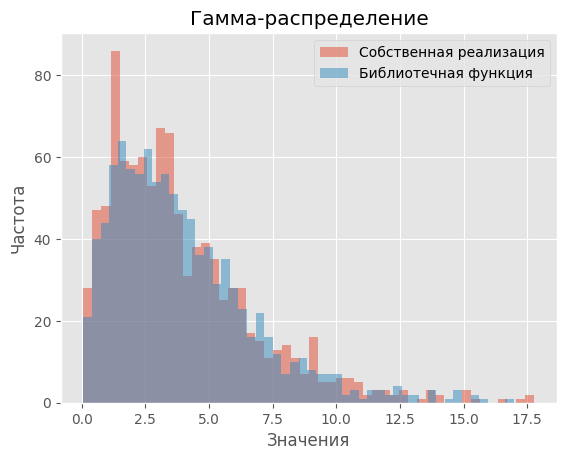

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_transform_exponential(u, rate):
    # Используем обратную функцию от экспоненциального распределения
    return -np.log(u) / rate #ln(u) - это естественный логарифм от u, и деление на raterate приводит к экспоненциальному распределению с параметром rate

def generate_gamma(u, k, theta):
    # Генерируем k независимых Э(1)
    exponential_values = [inverse_transform_exponential(np.random.rand(), 1) for _ in range(k)]

    # Суммируем k значений и умножаем на theta
    return theta * np.sum(exponential_values)

# Задаем параметры гамма-распределения
shape_gamma = 2  # параметр формы (shape)
scale_gamma = 2  # параметр масштаба (scale)

# Генерируем случайные числа из равномерного распределения на интервале [0, 1]
random_uniform_values_gamma = np.random.rand(1000)

# Применяем метод обратной функции для получения Гамма-распределения
generated_gamma_values = [generate_gamma(u, shape_gamma, scale_gamma) for u in random_uniform_values_gamma]

# Сравниваем с библиотечной функцией
library_values_gamma = np.random.gamma(shape_gamma, scale=scale_gamma, size=1000)

# Визуализация результатов
plt.title(f"Гамма-распределение")
plt.hist(generated_gamma_values, bins=50, alpha=0.5, label='Собственная реализация')
plt.hist(library_values_gamma, bins=50, alpha=0.5, label='Библиотечная функция')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()


Первые 5 сгенерированных значения (метод суммирования 1): [-1.6644315522922275, 0.7889920424806904, 1.0461773004669714, -0.2301702744758236, 0.0576773342492638]
Первые 5 сгенерированных значения (метод суммирования 2): [0.5013762180654813, -0.16561417462703387, 0.0026995632562401006, 0.15917867192495327, 0.8912207469556694]
Первые 5 сгенерированных значения (библиотечная реализация 1): [-0.60717528  0.76035694 -0.05717809 -0.36842685 -0.23454851]
Первые 5 сгенерированных значения (библиотечная реализация 2): [-0.21141837 -0.03929607  0.026766   -0.42847997  0.76217276]


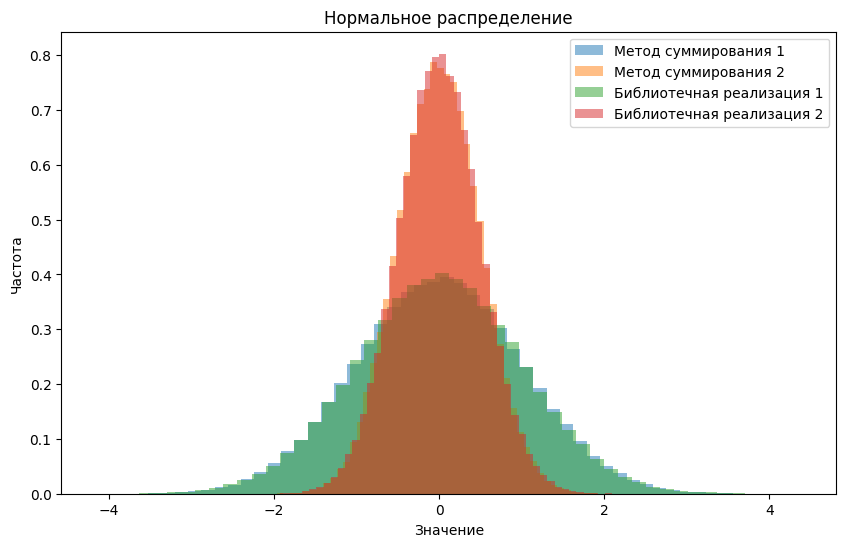

In [6]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_normal_distribution_sum(mean, std_dev, size):
    samples = []
    for _ in range(size):
        # Суммируем 12 случайных величин равномерно распределенных на [0, 1)
        sum_of_uniform = sum(random.uniform(0, 1) for _ in range(12))
        # Преобразуем к стандартному нормальному распределению
        z = sum_of_uniform - 6
        # Масштабируем и сдвигаем
        sample = mean + std_dev * z
        samples.append(sample)
    return samples

# Параметры нормального распределения
mean = 0
std_dev = 1
sample_size = 120000 #Попробуйте изменить значение sample_size и рассмотрите, как это влияет на форму и сходимость гистограммы к нормальному распределени

# Генерация выборки с использованием метода суммирования
generated_samples_sum_1 = generate_normal_distribution_sum(mean, std_dev, sample_size)
generated_samples_sum_2 = generate_normal_distribution_sum(mean, std_dev / 2, sample_size)  # Вторая реализация

# Библиотечная реализация нормального распределения
library_samples_1 = np.random.normal(mean, std_dev, sample_size)
library_samples_2 = np.random.normal(mean, std_dev / 2, sample_size)  # Вторая выборка

# Сравнение результатов
print("Первые 5 сгенерированных значения (метод суммирования 1):", generated_samples_sum_1[:5])
print("Первые 5 сгенерированных значения (метод суммирования 2):", generated_samples_sum_2[:5])
print("Первые 5 сгенерированных значения (библиотечная реализация 1):", library_samples_1[:5])
print("Первые 5 сгенерированных значения (библиотечная реализация 2):", library_samples_2[:5])

# Визуализация
plt.figure(figsize=(10, 6))

# Гистограмма для метода суммирования 1
plt.hist(generated_samples_sum_1, bins=50, density=True, alpha=0.5, label='Метод суммирования 1')

# Гистограмма для метода суммирования 2
plt.hist(generated_samples_sum_2, bins=50, density=True, alpha=0.5, label='Метод суммирования 2')

# Гистограмма для библиотечной реализации 1
plt.hist(library_samples_1, bins=50, density=True, alpha=0.5, label='Библиотечная реализация 1')

# Гистограмма для библиотечной реализации 2
plt.hist(library_samples_2, bins=50, density=True, alpha=0.5, label='Библиотечная реализация 2')

plt.title('Нормальное распределение')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.show()


Первые 5 сгенерированных значения (моделирование): [5.97207454 5.32800545 6.06439745 4.3190784  1.92329965]
Первые 5 сгенерированных значения (библиотечная реализация): [ 4.93295414  6.21804132 10.56853833  3.9328949  10.32551727]


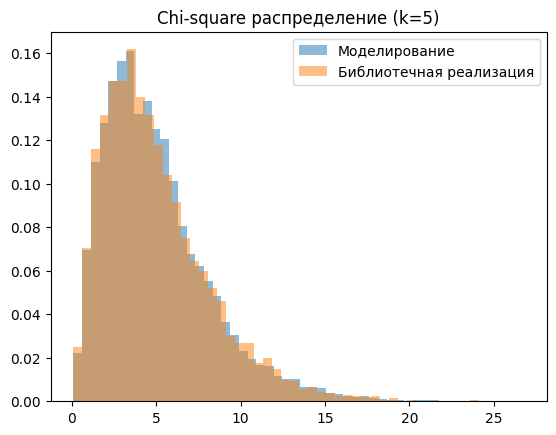

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_chi_square_distribution(df, size):
    # Генерация k независимых стандартных нормальных случайных величин
    normal_samples = np.random.normal(0, 1, (df, size))

    # Суммируем квадраты
    chi_square_samples = np.sum(normal_samples**2, axis=0)

    return chi_square_samples

# Параметры распределения
degrees_of_freedom = 5
sample_size = 10000

# Генерация выборки для chi-square распределения
generated_chi_square_samples = generate_chi_square_distribution(degrees_of_freedom, sample_size)

# Библиотечная реализация chi-square распределения
library_chi_square_samples = np.random.chisquare(degrees_of_freedom, size=sample_size)

# Сравнение результатов
print("Первые 5 сгенерированных значения (моделирование):", generated_chi_square_samples[:5])
print("Первые 5 сгенерированных значения (библиотечная реализация):", library_chi_square_samples[:5])

# Визуализация
plt.hist(generated_chi_square_samples, bins=50, density=True, alpha=0.5, label='Моделирование')
plt.hist(library_chi_square_samples, bins=50, density=True, alpha=0.5, label='Библиотечная реализация')
plt.title(f'Chi-square распределение (k={degrees_of_freedom})')
plt.legend()
plt.show()


In [ ]:
from numpy.random import rand
from scipy import stats
def my_uniform(a=0, b=1):
    alpha = rand()
    return a + alpha*(b - a)


def my_exp(ly):
    alpha = my_uniform()
    return -1/ly*log(alpha)


def my_Norm(n, M=0, D=1):
    sum = 0
    for i in range(n):
        sum = sum + my_uniform(0, 1)
    # return (sum/(n/2)-1) * D - M
    return D * ((12/n)**(1/2) * (sum - n/2)) + M


def theoretical_freqs(X, N, bins):
    m, s = st.mean(X), st.stdev(X)
    x_min, x_max = min(X), max(X)
    x_step = (x_max - x_min) / bins
    de_norm = stats.norm(m, s)
    x = [x_min + i * x_step for i in range(bins)]
    x_means = [i + x_step / 2 for i in x[:-1:]]
    p = [de_norm.cdf(x[i+1]) - de_norm.cdf(x[i]) for i in range(len(x)-1)]
    fs = [i * N for i in p]
    return x_means, fs

Text(0.5, 1.0, 'График выборки')

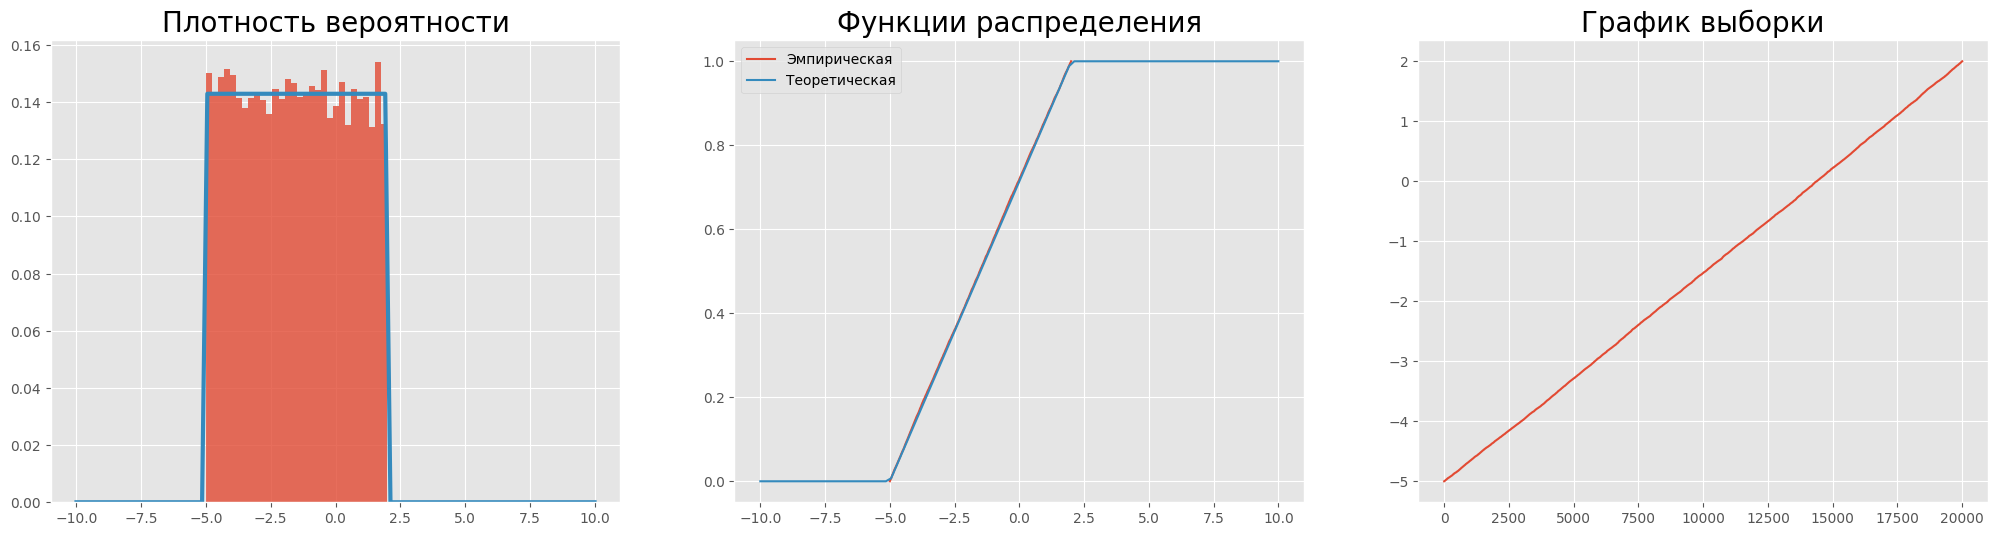

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

fig, ax = plt.subplots(figsize=(25, 6), nrows=1, ncols=3)

a = -5
b = 2
ly = 1
N = 20000
my_uni = [my_uniform(a=a, b=b) for _ in range(N)]

x = np.linspace(-10, 10, 100)
uniform = stats.uniform(loc=a, scale=b-a)
pdf = uniform.pdf(x)
cdf = uniform.cdf(x)

ecdf = ECDF(my_uni)
ax[0].hist(my_uni, density=True, alpha=0.8, bins=30)
ax[0].plot(x, pdf, linewidth=3)
ax[1].step(ecdf.x, ecdf.y)
ax[1].plot(x, cdf)
ax[2].plot(sorted(my_uni))

ax[1].legend(['Эмпирическая', 'Теоретическая'])

ax[0].set_title('Плотность вероятности', fontsize=20)
ax[1].set_title('Функции распределения', fontsize=20)
ax[2].set_title('График выборки', fontsize=20)

#РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ

Text(0.5, 1.0, 'График выборки')

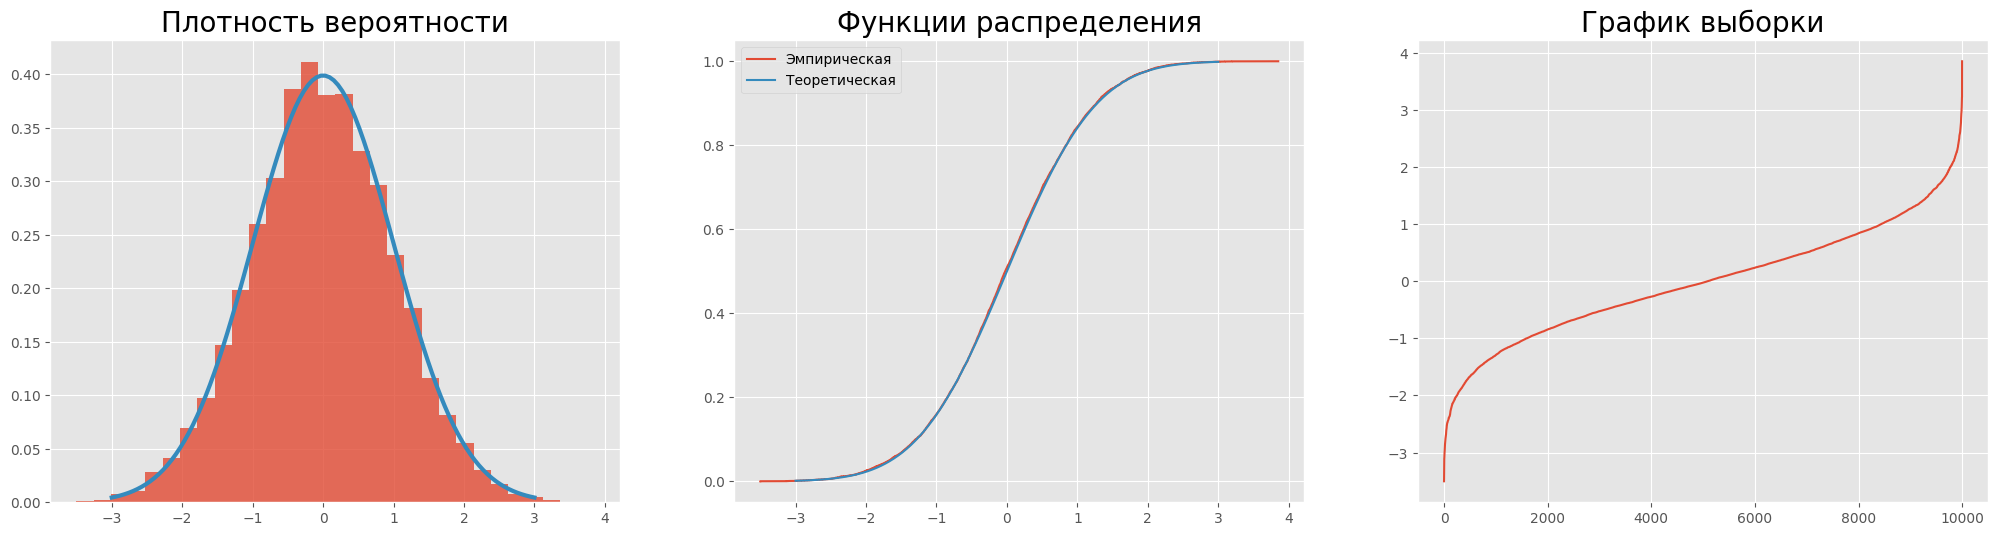

In [ ]:
#НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ
fig, ax = plt.subplots(figsize=(25, 6), nrows=1, ncols=3)


N = 10000
x = np.linspace(-3, 3, 100)
norm_rv = stats.norm(loc=0, scale=1)

normal = [my_Norm(20) for _ in range(N)]
pdf = norm_rv.pdf(x)
cdf = norm_rv.cdf(x)

ecdf = ECDF(normal)
ax[0].hist(normal, density=True, alpha=0.8, bins=30)
ax[0].plot(x, pdf, linewidth=3)
ax[1].step(ecdf.x, ecdf.y)
ax[1].plot(x, cdf)
ax[2].plot(sorted(normal))


ax[1].legend(['Эмпирическая', 'Теоретическая'])

ax[0].set_title('Плотность вероятности', fontsize=20)
ax[1].set_title('Функции распределения', fontsize=20)
ax[2].set_title('График выборки', fontsize=20)



In [ ]:
#ГАММА РАСПРЕДЕЛЕНИЕ
from math import exp, e, log
def GA1(k, ly=1):
    x = 0
    for _ in range(k):
        x += my_exp(ly)
    return x

def GA2(k, ly=1):
    x = my_Norm(12)
    x *= 0.5 * x
    for _ in range(int(k)):
        x += my_exp(ly)
    return x

def GS(k, ly=1):
    x = 0
    iter = 0
    while iter < 1e9:
        U = my_uniform(a=0, b=1+k/e)
        W = my_exp(ly)
        if (U <= 1):
            x = U**(1/k)
            if (x <= W):
                return x
        else:
            x = -log((1-U) / k+1 / e)
            if ((1-k)*log(x) <= W):
                return x
    return np.nan

def GF(k, ly):
    E1 = my_exp(ly)
    E2 = my_exp(ly)
    while (E2 < (k-1) * (E1 - log(E1) - 1)):
        E1 = my_exp(ly)
        E2 = my_exp(ly)
    return k*E1

def Gamma(k, ly):
    if type(k) is int:
        return GA1(k, ly)
    elif k < 1:
        return GS(k, ly)
    elif k > 1 and k < 3:
        return GF(k, ly)



Text(0.5, 1.0, 'График выборки')

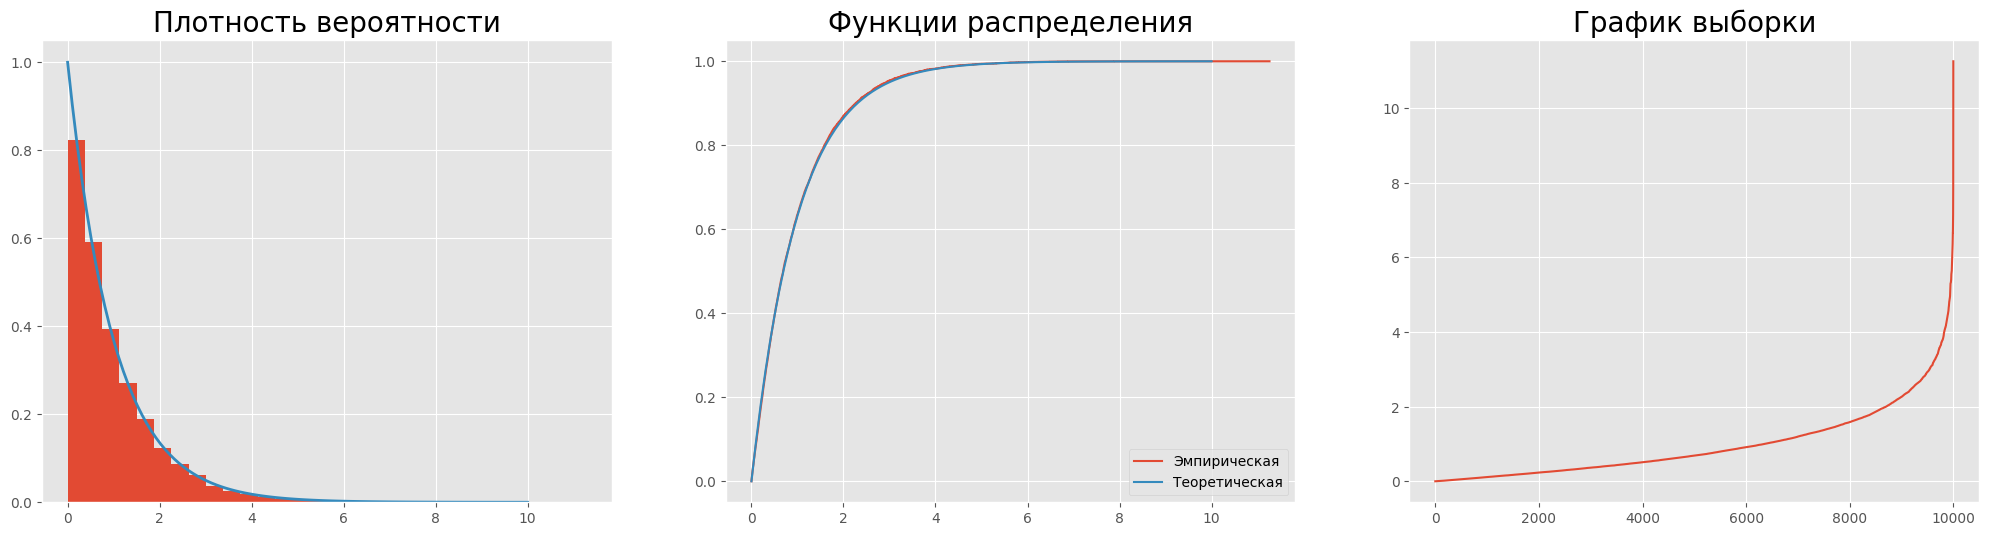

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6), nrows=1, ncols=3)

N = 10000
x = np.linspace(0, 10, 100)
tetta = 1
gamma = stats.gamma(1, scale=1/tetta)
gamma_distribution = [Gamma(1, tetta) for _ in range(N)]
pdf = gamma.pdf(x)
cdf = gamma.cdf(x)

ecdf = ECDF(gamma_distribution)

ax[0].hist(gamma_distribution, bins=30, density=True, log=False)
ax[0].plot(x, pdf, linewidth=2)
ax[1].step(ecdf.x, ecdf.y)
ax[1].plot(x, cdf)
ax[2].plot(sorted(gamma_distribution))

ax[1].legend(['Эмпирическая', 'Теоретическая'])

ax[0].set_title('Плотность вероятности', fontsize=20)
ax[1].set_title('Функции распределения', fontsize=20)
ax[2].set_title('График выборки', fontsize=20)


In [ ]:
#ХИ КВАДРАТ
def ChiTest(n):
    sum = 0
    for _ in range(n):
        sum = sum + my_Norm(20)**2
    return sum

Text(0.5, 1.0, 'График выборки')

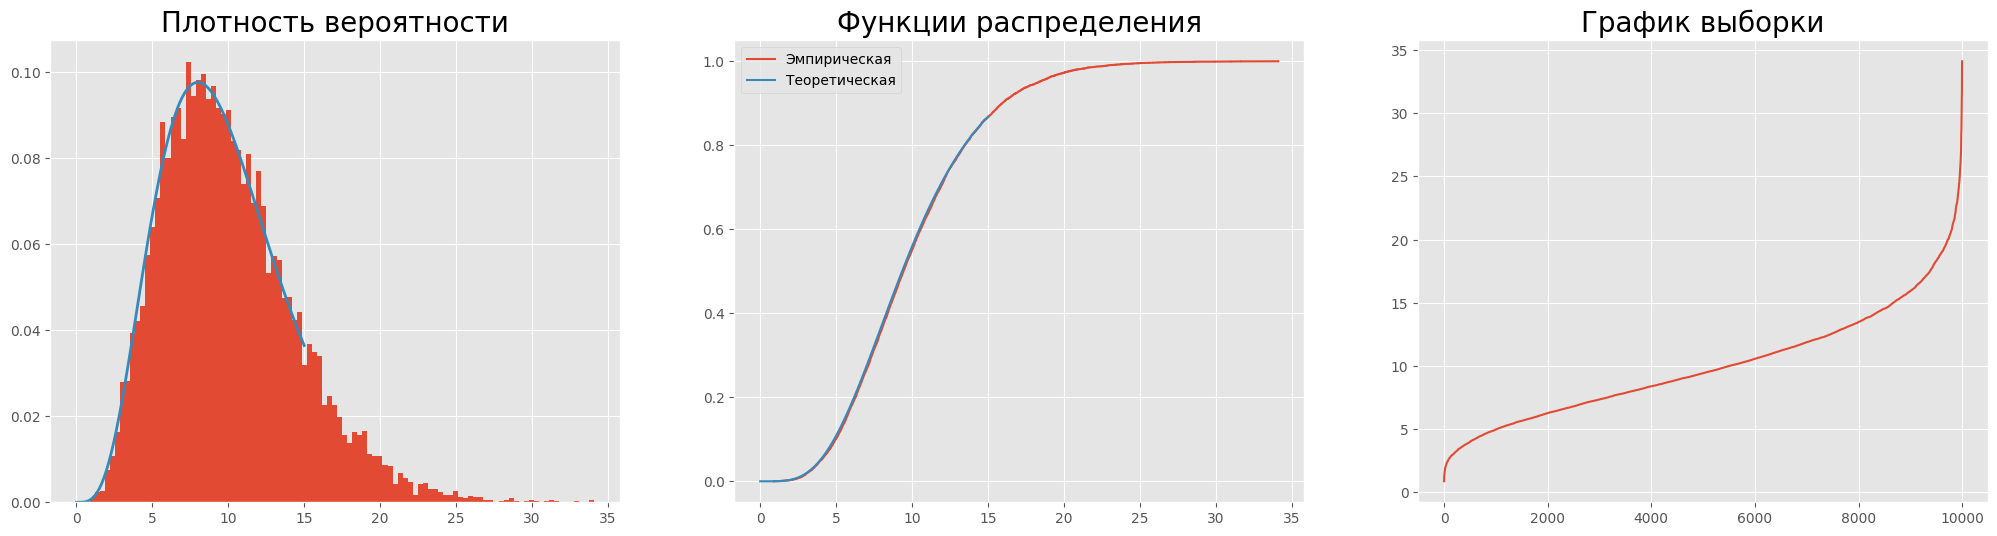

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6), nrows=1, ncols=3)

N = 10000
n = 10
x = np.linspace(0, 15, 100)
chi2 = stats.chi2(df=n)
pdf = chi2.pdf(x)
cdf = chi2.cdf(x)

my_chi_square = [ChiTest(n) for _ in range(N)]
ecdf = ECDF(my_chi_square)

ax[0].hist(my_chi_square, bins=100, density=True, log=False)
ax[0].plot(x, pdf, linewidth=2)
ax[1].step(ecdf.x, ecdf.y)
ax[1].plot(x, cdf)
ax[2].plot(sorted(my_chi_square))

ax[1].legend(['Эмпирическая', 'Теоретическая'])

ax[0].set_title('Плотность вероятности', fontsize=20)
ax[1].set_title('Функции распределения', fontsize=20)
ax[2].set_title('График выборки', fontsize=20)




**Алгоритм генерации случайной дискретной величины в данной функции можно описать следующим образом:**
 **1.Инициализация переменных **   

values: Набор значений случайной величины.
probabilities: Вероятности соответствующих значений.
num_samples: Количество образцов, которые необходимо сгенерировать (по умолчанию 1).

**2.Генерация случайного числа M:**  

M = random.uniform(0, 1) - генерация случайного числа с равномерным распределением от 0 до 1.

**3.Выбор значения случайной величины:**

Цикл, в котором сравнивается M с кумулятивными вероятностями значений.
Если M больше кумулятивной вероятности текущего значения, уменьшаем M на эту вероятность и переходим к следующему значению.
Когда M становится меньше или равно кумулятивной вероятности, выбираем текущее значение.

**4.Возврат результата:**

Если num_samples > 1, возвращаем список сгенерированных значений.
Если num_samples == 1, возвращаем единичное значение.



In [ ]:
import numpy as np

def generate_discrete_random_variable(P, distribution_type):
    M = random.uniform(0, 1)
    m = 0

    while m < len(P) - 1 and M > P[m]:#пока M больше кумулятивной вероятности для текущего значения,
        M -= P[m] #  уменьшаем M на эту вероятность
        m += 1 #и переходим к следующему значению.

    return m

def generate_discrete_random_variable(values, probabilities, num_samples=1):#алгоритм генерации случайной дискретной величины на основе заданных значений и вероятностей.
    result = np.random.choice(values, size=num_samples, p=probabilities) #выбора случайных значений из заданного набора values с учетом заданных вероятностей probabilities
    return result.tolist() if num_samples > 1 else result[0] # возвращение результата в виде списка

# Заданные случайные величины и их вероятности
values = [1, 2, 3, 4, 5]
probabilities = [0.1, 0.2, 0.3, 0.2, 0.2]  # Вероятности изменены, чтобы суммировались до 1

# Моделирование нескольких случайных величин
num_samples = 5
results = generate_discrete_random_variable(values, probabilities, num_samples)

print(f"Смоделированные значения случайной величины: {results}")


Смоделированные значения случайной величины: [5, 1, 3, 3, 3]
